# Laboratorio 1(Machine Learning)

Dataset.- ([House Sales in King County, USA](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction "Dataset")) Mediante las caracteristicas de una casa, se puede llegar a predecir el precio estimado de una casa.


### Variables de entrada(X):
- numero de dormitorios
- numero de baños
- pies cuadrados_living
- ote_pies cuadrados
- pisos
- frente al mar 
- vista
- condición
- calificación
- pies cuadrados_arriba
- pies cuadrados_sótano
- año_construcción
- año_renovado
- código postal
- latitud
- largo
- pies cuadrados_living
- pies cuadrados_lote

### Variable de salida(Y):
- Prediccion del precio de una vivienda
#### Especificacion de cada columna.-
- **Primera columna(id).-** Un id que identifica a cada casa dentro del dataset.
- **Segunda colmumna(date).-** Fecha en la que se añadio la casa al dataset.
- **Tercer columna(bedrooms).-** Especifica el numero de dormitorios que contiene la casa.
- **Cuarta columna(bathrooms).-** Especifica el numero de dormitorios que contiene la casa.
- **Quinta columna(sqft_living).-** Pies cuadrados habitables. Esta expresión se utiliza para indicar la medida del espacio interior utilizable en una vivienda o edificación.
- **Sexta columna(sqft_lot).-** Pies cuadrados del lote. Este término se utiliza para indicar la medida del terreno o parcela en la que se encuentra una propiedad.
- **Septima columna(floors).-** El numero de pisos que contine la casa.
- **Octava columna(waterfront).-** significa que se encuentra en la línea de costa o a orillas de un cuerpo de agua. 1 para si, y 0 para no.
- **Novena columna(view).-** La presencia de una buena vista puede tener un impacto significativo en el valor y atractivo de una propiedad. 1 si 0 no.
- **Decima columna(condition).-** Se refiere al estado general de una propiedad, es decir, a su condición física y estructural, del 1 al 5.
- **Onceava columna(grade).-** Se refiere al grado de pocision de la casa.
- **Doceava columna(sqft_above).-** Pies cuadrados arriba. Este término se utiliza para describir la medida del espacio habitable en una propiedad que está ubicado por encima del nivel del suelo
- **Treceava columna(sqft_basement).-** Pies cuadrados del sótano. Este término se utiliza para describir la medida del espacio habitable que se encuentra en el sótano de una propiedad.
- **Catorceava columna(yr_built).-** Refiere al año de construcción de una propiedad. Este término se utiliza para indicar el año en que la estructura principal de una casa, edificio o propiedad fue construida.
- **Quinceava columna(yr_renovated).-** refiere al año en que una propiedad fue renovada.
- **Dieciseisava columna(zipcode).-** Es un término utilizado en los Estados Unidos para referirse al código postal de una determinada área geográfica. 
- **Diecisiteava columna(lat).-** Generalmente se refiere a la latitud de una ubicación geográfica específica.
- **Dieciochoava columna(long).-** Generalmente se refiere a la longitud de una ubicación geográfica específica.
- **Diecinueveava columna(sqft_living15).-** es un término utilizado en bienes raíces para describir la medida del espacio habitable de una propiedad específica,sugiere que la medida se refiere a la superficie habitable específica para el año 2015.
- **Veinteava columna(sqft_lot15).-** es un término utilizado en bienes raíces para describir la medida del tamaño del terreno de una propiedad específica, se refiere al tamaño del terreno específico para el año 2015.

## 1. regresion lineal multivariable
Se implementa la regresion lineal multivariable para predecir el precio de las casas en USA. El archivo `kc_house_data.csv` contiene un conjunto de entrenamiento de precios de casas en en el condado mde King, Estado Unidos.
a continuacion se especifica cada columna del dataset.-



In [2]:
# utilizando la libreria os para manejos de directorios
import os

# Computacion vectorial y cientifica para python
import numpy as np

#importamos pandas para el manejo del dataset, y separarlos dentro de una matriz
import pandas as pd
from tabulate import tabulate

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # -> Necesario para graficar superficies 3D

#Para separa el 20% y 80%
from sklearn.model_selection import train_test_split

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline


### 1.1 Cargamos los datos del dataset


In [205]:
data = pd.read_csv('kc_house_data.csv', delimiter=',')

#retiramos el id y la fecha del las columnas, quitamos el precio ya que ira a el vector Y, tambien quitamos los titulos
dataset = data.drop(['id', 'date'], axis=1).astype(float)

train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)

X_regre_test = test_dataset.drop(['price'], axis=1).values
y_regre_test = test_dataset['price'].values

# Seleccionamos las columnas para X y la columna 'price' para y
X_regre = train_dataset.drop(['price'], axis=1).values
y_regre = train_dataset['price'].values
m_regre = len(y_regre)
# Ahora, X y y deberían contener datos numéricos del 80% del dataset

# imprimir todos las X de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]',
    'X[:, 12]', 'X[:, 13]', 'X[:, 14]', 'X[:, 15]', 'X[:, 16]', 'X[:, 17]', 'Y'
))
print('-' * 180)

for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}{:10.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:10.0f}{:8.0f}{:10.0f}{:10.0f}{:10.0f}{:10.2f}{:10.2f}{:10.0f}{:11.0f}{:14.0f}'.format(
        X_regre[i, 0], X_regre[i, 1], X_regre[i, 2], X_regre[i, 3], X_regre[i, 4], X_regre[i, 5], X_regre[i, 6], X_regre[i, 7], X_regre[i, 8], X_regre[i, 9], X_regre[i, 10], X_regre[i, 11],
        X_regre[i, 12], X_regre[i, 13], X_regre[i, 14], X_regre[i, 15], X_regre[i, 16], X_regre[i, 17], y_regre[i]
    ))


  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]  X[:, 12]  X[:, 13]  X[:, 14]  X[:, 15]  X[:, 16]  X[:, 17]         Y
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
       3       2      1780     13095       1       0       0       4       9      1780       0      1983         0     98042     47.37   -122.15      2750      13095        325000
       2       1      1000      3700       1       0       0       3       6       800     200      1929         0     98118     47.55   -122.29      1270       5000        257000
       3       1      1080      7486       2       0       0       3       6       990      90      1942         0     98146     47.48   -122.33      1170       7800        228500
       3       2      2090      7500       1       0       0       4       7      1280     810      197

<a id="section4"></a>
### 1.2 Normalización de caracteristicas

Al visualizar los datos se puede observar que las caracteristicas tienen diferentes magnitudes, por lo cual se debe transformar cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente. En este caso
### Hacemos el uso de la siguiente funcion para normalizar los datos

In [240]:
def  featureNormalize(X):
    X_norm = X.copy()
    
    #creamos un array de ceros con una longitud igual al número de columnas en el array X. La variable mu y sigma se inicializa como este array de ceros.
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    #Creamos el promedio de cada columna de X
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    
    #normalizamos los datos con la siguiente formula
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma


Normalizamos los datos

In [174]:
# llama featureNormalize con los datos cargados

X_norm, mu_regre, sigma_regre = featureNormalize(X_regre)

print('{:>8s}{:>10s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X_norm[:,0]', '  X_norm[:, 1]', '  X_norm[:, 2]', '  X_norm[:, 3]', '  X_norm[:, 4]', '  X_norm[:, 5]', '  X_norm[:, 6]', '  X_norm[:, 7]', '  X_norm[:, 8]', '  X_norm[:, 9]', '  X_norm[:, 10]', '  X_norm[:, 11]',
    '  X_norm[:, 12]', '  X_norm[:, 13]', '  X_norm[:, 14]', '  X_norm[:, 15]', '  X_norm[:, 16]', '  X_norm[:, 17]'
))
print('-' * 172)

for i in range(10):
    print('{:8.4f}{:17.4f}{:13.4f}{:14.4f}{:15.4f}{:14.4f}{:14.4f}{:14.4f}{:14.4f}{:14.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}'.format(
        X_norm[i, 0], X_norm[i, 1], X_norm[i, 2], X_norm[i, 3], X_norm[i, 4], X_norm[i, 5], X_norm[i, 6], X_norm[i, 7], X_norm[i, 8], X_norm[i, 9], X_norm[i, 10], X_norm[i, 11],
        X_norm[i, 12], X_norm[i, 13], X_norm[i, 14], X_norm[i, 15], X_norm[i, 16], X_norm[i, 17]
    ))

print('Media calculada:', mu_regre)
print('Desviación estandar calculada:', sigma_regre)


X_norm[:,0]  X_norm[:, 1]  X_norm[:, 2]  X_norm[:, 3]  X_norm[:, 4]  X_norm[:, 5]  X_norm[:, 6]  X_norm[:, 7]  X_norm[:, 8]  X_norm[:, 9]  X_norm[:, 10]  X_norm[:, 11]  X_norm[:, 12]  X_norm[:, 13]  X_norm[:, 14]  X_norm[:, 15]  X_norm[:, 16]  X_norm[:, 17]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 -0.3953          -0.4745      -0.3239       -0.0439        -0.9196       -0.0850       -0.3059        0.9091        1.1502       -0.0073        -0.6563         0.4040        -0.2083        -0.6746        -1.3966         0.4423         1.1261         0.0134
 -1.4690          -1.4526      -1.1837       -0.2858        -0.9196       -0.0850       -0.3059       -0.6254       -1.4132       -1.2000        -0.2004        -1.4306        -0.2083         0.7506        -0.0602        -0.5400        -1.0465        -0.2807
 -0.3953          -1.4526      -1.0955       -0.1883 

### 1.3 Graficar las caracteristicas
 graficamos cada caracteristica respecto a Y, esto para ver la relacion entre estos.

In [64]:
# Creamos una funcion que nos ayude con las graficas de cada dato respecto a la Y predicha
def graficarDatos(x, y, xlabel, ylabel):
  fig = pyplot.figure()
  pyplot.plot(x, y, 'ro')

  pyplot.xlabel(xlabel)
  pyplot.ylabel(ylabel)

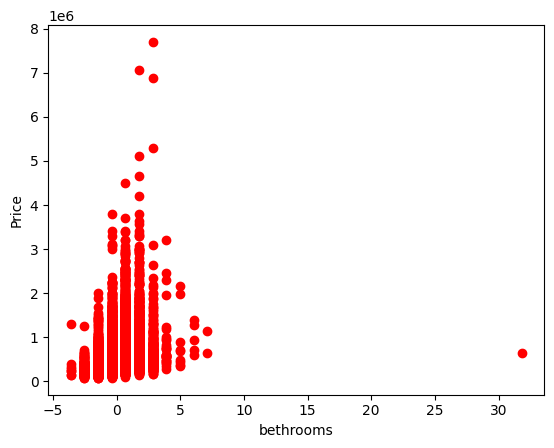

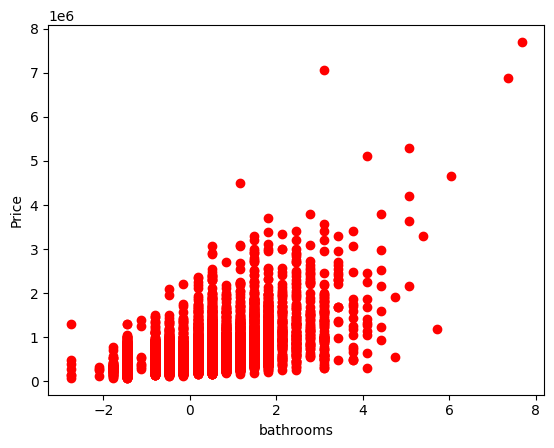

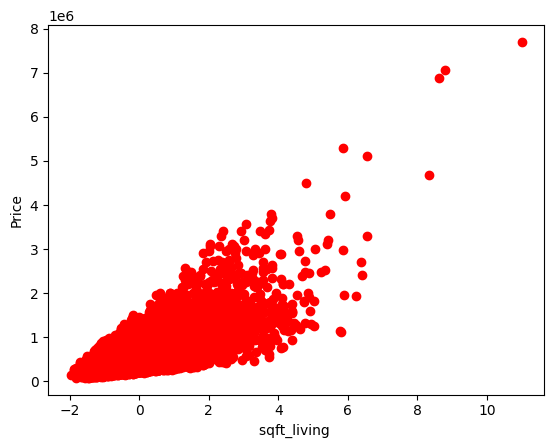

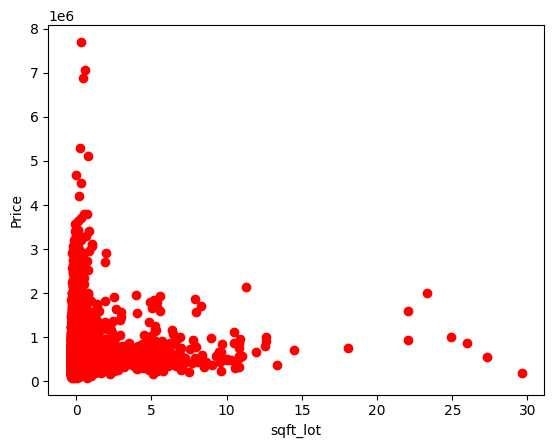

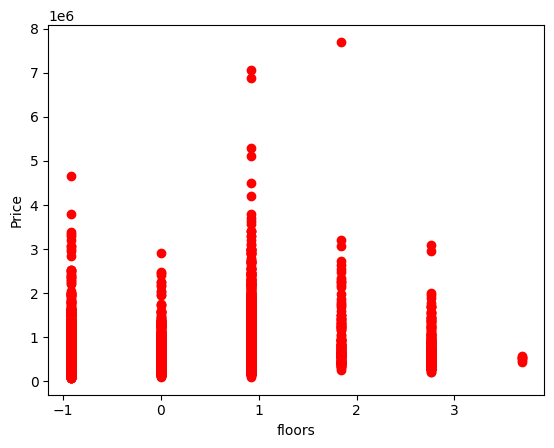

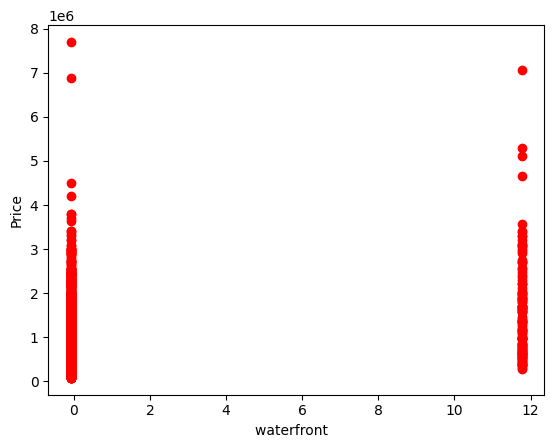

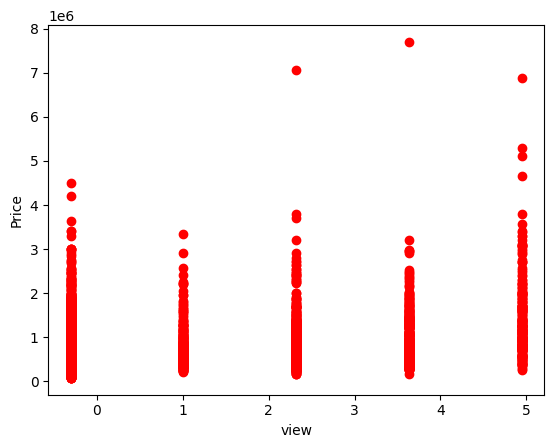

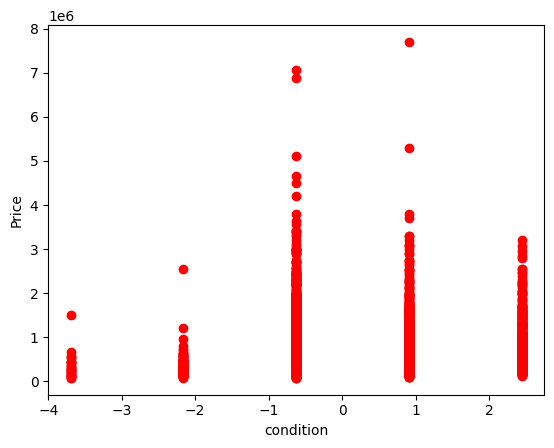

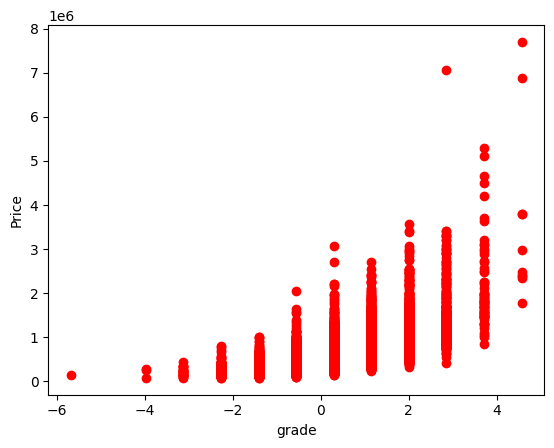

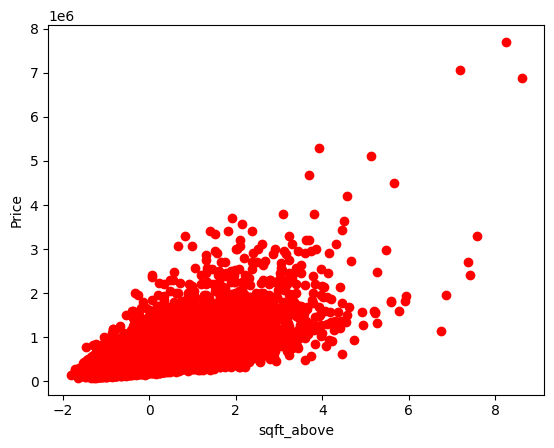

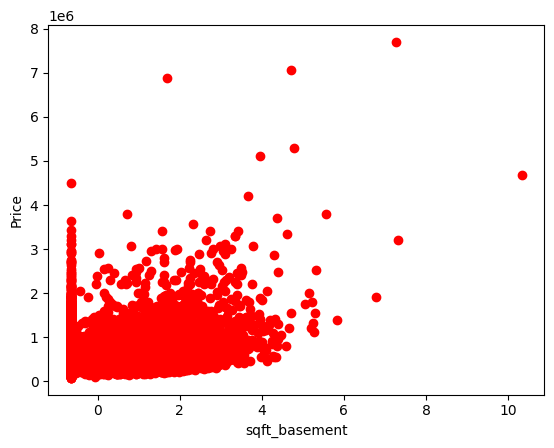

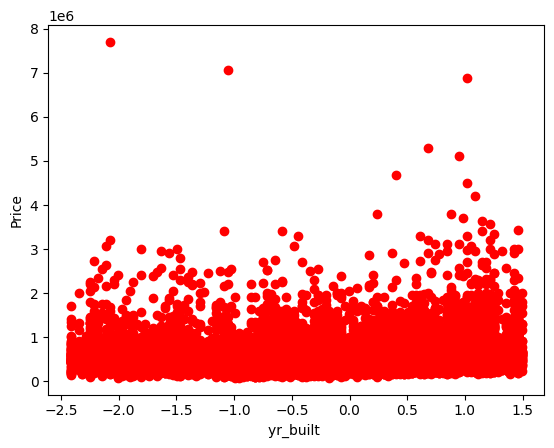

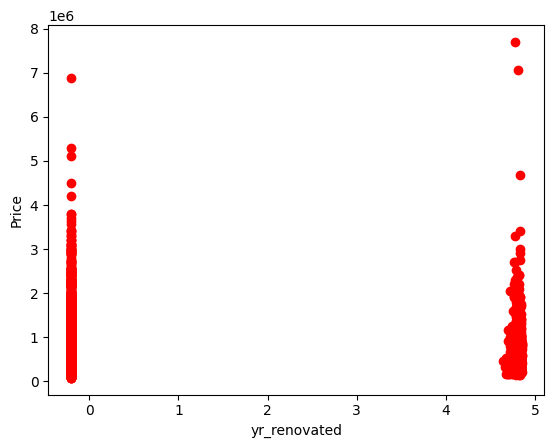

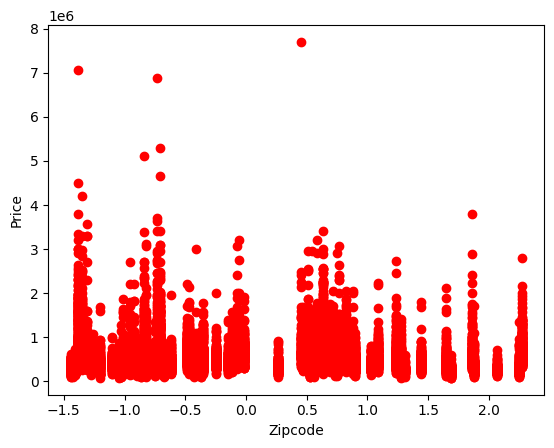

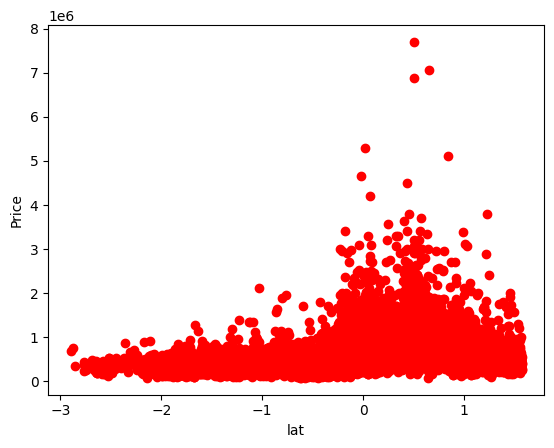

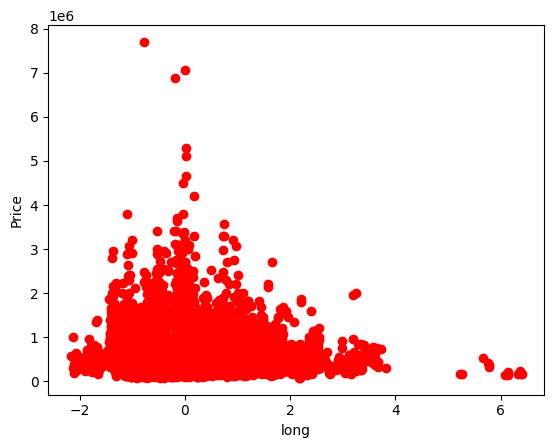

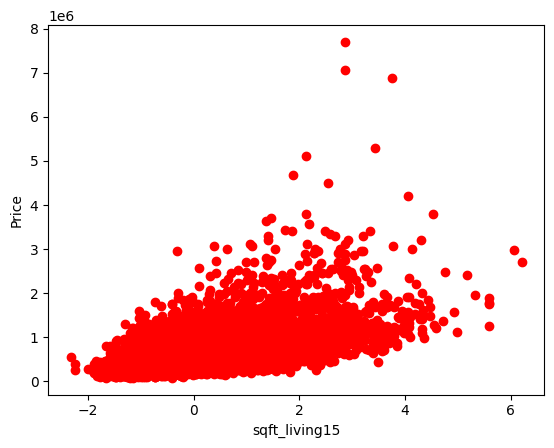

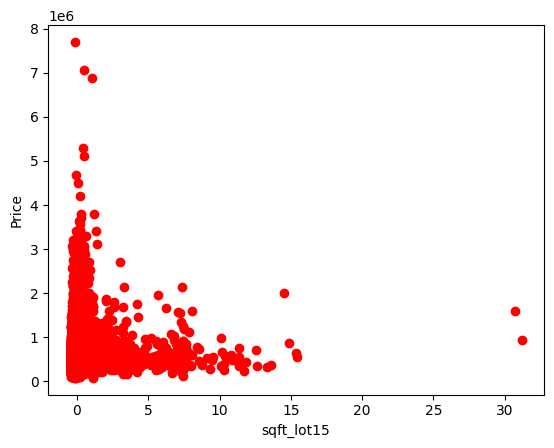

In [175]:

xlabel1 = "bethrooms"
xlabel2 = "bathrooms"
xlabel3 = "sqft_living "
xlabel4 = "sqft_lot"
xlabel5 = "floors"
xlabel6 = "waterfront  "
xlabel7 = "view"
xlabel8 = "condition"
xlabel9 = "grade"
xlabel10 = "sqft_above"
xlabel11 = "sqft_basement"
xlabel12 = "yr_built "
xlabel13 = "yr_renovated"
xlabel14 = "Zipcode"
xlabel15 = "lat"
xlabel16 = "long"
xlabel17 = "sqft_living15"
xlabel18 = "sqft_lot15"

ylabel1 = "Price"
graficarDatos(X_norm[:, 0], y_regre, xlabel1, ylabel1)
graficarDatos(X_norm[:, 1], y_regre, xlabel2, ylabel1)
graficarDatos(X_norm[:, 2], y_regre, xlabel3, ylabel1)
graficarDatos(X_norm[:, 3], y_regre, xlabel4, ylabel1)
graficarDatos(X_norm[:, 4], y_regre, xlabel5, ylabel1)
graficarDatos(X_norm[:, 5], y_regre, xlabel6, ylabel1)
graficarDatos(X_norm[:, 6], y_regre, xlabel7, ylabel1)
graficarDatos(X_norm[:, 7], y_regre, xlabel8, ylabel1)
graficarDatos(X_norm[:, 8], y_regre, xlabel9, ylabel1)
graficarDatos(X_norm[:, 9], y_regre, xlabel10, ylabel1)
graficarDatos(X_norm[:, 10], y_regre, xlabel11, ylabel1)
graficarDatos(X_norm[:, 11], y_regre, xlabel12, ylabel1)
graficarDatos(X_norm[:, 12], y_regre, xlabel13, ylabel1)
graficarDatos(X_norm[:, 13], y_regre, xlabel14, ylabel1)
graficarDatos(X_norm[:, 14], y_regre, xlabel15, ylabel1)
graficarDatos(X_norm[:, 15], y_regre, xlabel16, ylabel1)
graficarDatos(X_norm[:, 16], y_regre, xlabel17, ylabel1)
graficarDatos(X_norm[:, 17], y_regre, xlabel18, ylabel1)



# <a id="section2"></a>
### 1.4 Descenso por el gradiente

Primero agregamos unos a la matriz de X

<a id="section2"></a>
#### 1.4.1 Cálculo del costo $J(\theta)$

In [177]:
# No olvidarse agregar unos a la matriz de x

X_ready = np.concatenate([np.ones((m_regre, 1)), X_norm], axis=1)

#Imprimimos X_ready
print('{:>8s}{:>10s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X_ready[:,0]', '  X_ready[:, 1]', '  X_ready[:, 2]', '  X_ready[:, 3]', '  X_ready[:, 4]', '  X_ready[:, 5]', '  X_ready[:, 6]', '  X_ready[:, 7]', '  X_ready[:, 8]', '  X_ready[:, 9]', '  X_ready[:, 10]', '  X_ready[:, 11]',
    '  X_ready[:, 12]', '  X_ready[:, 13]', '  X_ready[:, 14]', '  X_ready[:, 15]', '  X_ready[:, 16]', '  X_ready[:, 17]', '  X_ready[:, 18]'
))
print('-' * 292)

for i in range(10):
    print('{:10.0f}{:17.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}{:17.4f}{:15.4f}{:17.4f}{:17.4f}{:14.4f}{:17.4f}{:15.4f}{:17.4f}'.format(
        X_ready[i, 0], X_ready[i, 1], X_ready[i, 2], X_ready[i, 3], X_ready[i, 4], X_ready[i, 5], X_ready[i, 6], X_ready[i, 7], X_ready[i, 8], X_ready[i, 9], X_ready[i, 10], X_ready[i, 11],
        X_ready[i, 12], X_ready[i, 13], X_ready[i, 14], X_ready[i, 15], X_ready[i, 16], X_ready[i, 17], X_ready[i, 18]
    ))

X_ready[:,0]  X_ready[:, 1]  X_ready[:, 2]  X_ready[:, 3]  X_ready[:, 4]  X_ready[:, 5]  X_ready[:, 6]  X_ready[:, 7]  X_ready[:, 8]  X_ready[:, 9]  X_ready[:, 10]  X_ready[:, 11]  X_ready[:, 12]  X_ready[:, 13]  X_ready[:, 14]  X_ready[:, 15]  X_ready[:, 16]  X_ready[:, 17]  X_ready[:, 18]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
         1          -0.3953        -0.4745        -0.3239        -0.0439        -0.9196        -0.0850        -0.3059         0.9091         1.1502        -0.0073          -0.6563         0.4040          -0.2083          -0.6746       -1.3966           0.4423         1.1261           0.0134
         1          -1.4690        -1.4526        -1.1837        -0.2858        -0.9196        -0.0850        -0.3059      

In [206]:
#Creamos la funcion de calcular costo
def calcularCosto(X, y, theta):
  m = y.size
  J = 0
  #h = np.dot(X, theta)
  # print(h)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J

Ejemplo de funcionamiento de la funcion computeCoste con dos valores diferentes de $\theta$. 

In [207]:
theta=np.array([0.2, 3.0, 0.2,0.1, 3.0, 0.2,1.1, 2.0, 0.7,0.8, 5.8, 0.9,0.7, 2.0, 0.5,0.8, 1.0, 0.2,0.3])
theta1=np.array([0.1, 2.0, 0.5,0.2, 8.0, 0.7,1.3, 8.0, 1.7,0.7, 7.1, 0.6,0.6, 1.0, 0.3,0.9, 2.0, 0.12,0.7])

print(theta.shape[0])
# theta1=np.array([0.5, 7.0, 0.2])

print(f"########################################################################################################")
print(f"con theta:{ theta } se obtiene un costo de: {calcularCosto(X_ready, y_regre, theta)}")
print(f"########################################################################################################")
print(f"con theta:{ theta1 } se obtiene un costo de: {calcularCosto(X_ready, y_regre, theta1)}")

19
########################################################################################################
con theta:[0.20 3.00 0.20 0.10 3.00 0.20 1.10 2.00 0.70 0.80 5.80 0.90 0.70 2.00
 0.50 0.80 1.00 0.20 0.30] se obtiene un costo de: 209918722469.17972
########################################################################################################
con theta:[0.10 2.00 0.50 0.20 8.00 0.70 1.30 8.00 1.70 0.70 7.10 0.60 0.60 1.00
 0.30 0.90 2.00 0.12 0.70] se obtiene un costo de: 209917518342.74518


<a id="section3"></a>
#### 1.4.2 Descenso por el gradiente

El costo $J(\theta)$ esta parametrizado por el vector $\theta$, no $X$ y $y$. Donde hay que minimizar el valor de $J(\theta)$ cambiando los valores del vector $\theta$. Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de $J(\theta)$ y verificar si estos decresen en cada paso. 

Creamos la funcion para calcular el descenso por la gradiente y obtener un theta y J_historico.

In [208]:
#Creamos la funcion para calcular el descenso por Gradiente
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
  m = y.shape[0]
  theta = theta.copy()
  J_historico = []

  for i in range(numero_iteraciones):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_historico.append(calcularCosto(X, y, theta))

  return theta, J_historico

Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.01.

In [180]:
#creamos un theta con 19 columnas de ceros
theta = np.zeros(19)

#numero de iteraciones sera 1000000 y un alpha 0.00009
num_ite = 1000000
alpha = 0.00009

theta, J_historico = calcularDescensoGradiente(X_ready, y_regre, theta, alpha, num_ite)
print("########################################################################################################")
print("Los valores de theta calculados son:")
i = 0
for tht in theta:
    i += 1
    print(f"theta {i}: {tht}")

    
print(f"########################################################################################################")
#mostramos el ultimo costo, este seria el mejor costo
print(f"con un costo de: { J_historico[-1]} ")

# print("Grafica la convergencia del costo")
# Grafica de la convergencia del costo




########################################################################################################
Los valores de theta calculados son:
theta 1: 537768.0479461494
theta 2: -31978.583299791895
theta 3: 34170.64706615746
theta 4: 80144.32843731593
theta 5: 3450.664706644344
theta 6: 3801.3186140783114
theta 7: 47457.603984666945
theta 8: 40859.880150963414
theta 9: 15983.536365095084
theta 10: 110674.78739953374
theta 11: 74521.83771206289
theta 12: 26179.565148995916
theta 13: -78907.76767421946
theta 14: 8135.460850432893
theta 15: -29448.640154941168
theta 16: 82498.66063244686
theta 17: -27338.173507407795
theta 18: 14451.471943744758
theta 19: -8968.347150906771
########################################################################################################
con un costo de: 19655941176.116375 


Se utilizan los parametros finales para grafical la linea.

### 1.5 Grafica de la convergencia del costo
graficamos el costo

Text(0, 0.5, 'Costo J')

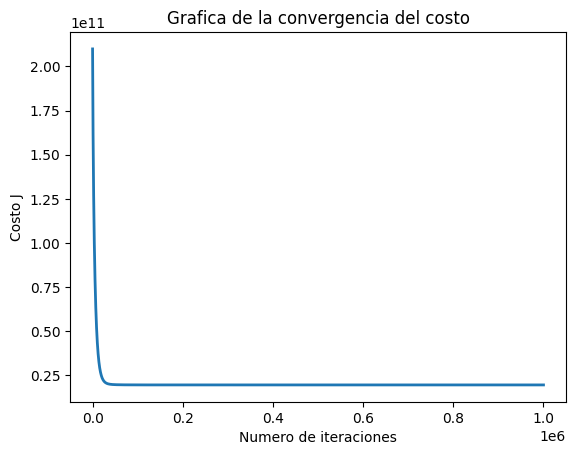

In [181]:
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.title("Grafica de la convergencia del costo")
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

#### 1.5.1 Grafica de la regresion lineal

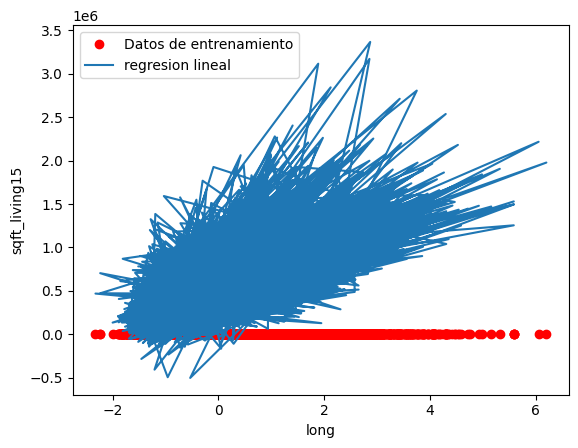

In [182]:
graficarDatos(X_ready[:, 17], X_ready[:, 18], xlabel16, xlabel17)

pyplot.plot(X_ready[:, 17], np.dot(X_ready, theta), '-')

pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

### 1.6 Ejemplos de Predicciones


Se creo una matriz con 11 ejemplos, donde se hace las predicciones correpondientes:

In [183]:
#Creamos la matriz con 11 ejemplos para hacer la prueba predecir un precio de cada ejemplo:
matriz_datos_regre = np.array([
    [1,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650],
    [1,2,0.75,1020,1076,2,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357],
    [1,4,2.75,3555,6565,2,0,0,3,9,3555,0,2014,0,98053,47.6847,-122.017,3625,5637],
    [1,2,1,1040,13920,1,0,0,3,6,1040,0,1973,1867,98198,47.3756,-122.306,1100,7575],
    [1,4,1.75,1860,7350,1,0,0,4,7,1090,770,1977,1900,98031,47.3979,-122.174,1710,7350],
    [1,1,1,1060,54846,1,1,4,3,5,1060,0,1935,0,98070,47.4716,-122.445,2258,31762],
    [1,4,1.5,2220,9496,1,0,0,4,7,1490,730,1954,0,98004,47.6233,-122.206,1800,8286],
    [1,4,1.5,1560,6534,1,0,0,4,7,1560,0,1962,0,98007,47.6012,-122.152,1560,6969],
    [1,5,3,2510,4125,1.5,0,3,5,8,1590,920,1925,0,98144,47.5968,-122.29,2190,5415],
    [1,3,2.5,1680,2096,2,0,0,3,8,1380,300,2008,0,98117,47.6904,-122.37,1360,2096],
    [1,3,2.25,2020,3600,2,0,0,3,8,2020,0,1998,0,98033,47.6678,-122.165,2070,3699]
])

#creamos un vector parta almacenar cada Y predicha
y_pre = []
matriz_datos_copy = matriz_datos_regre.copy()

#Normalizamos todos, menos el primer valor de cada ejemplo
for datos in matriz_datos_regre:
    datos[1:] = (datos[1:] - mu_regre) / sigma_regre
    

#Calculamos la Y predicha de los 11 ejemplos de prediccion
for datos in matriz_datos_regre:
    y_pre.append(np.dot(datos, theta))

matriz_datos_copy = np.column_stack((matriz_datos_copy, y_pre))

nombres_columnas = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15','Price']

# Convertir la matriz en una lista de listas
datos_para_tabla = matriz_datos_copy.tolist()

# Imprimir la tabla
print(tabulate(datos_para_tabla, headers=nombres_columnas, tablefmt='grid'))


+----+------------+-------------+---------------+------------+----------+--------------+--------+-------------+---------+--------------+-----------------+------------+----------------+-----------+---------+----------+-----------------+--------------+----------+
|    |   bedrooms |   bathrooms |   sqft_living |   sqft_lot |   floors |   waterfront |   view |   condition |   grade |   sqft_above |   sqft_basement |   yr_built |   yr_renovated |   zipcode |     lat |     long |   sqft_living15 |   sqft_lot15 |    Price |
+====+============+=============+===============+============+==========+==============+========+=============+=========+==============+=================+============+================+===========+=========+==========+=================+==============+==========+
|  1 |          3 |        1    |          1180 |       5650 |      1   |            0 |      0 |           3 |       7 |         1180 |               0 |       1955 |              0 |     98178 | 47.5112 | -122.25

### 1.7 Validaciones
Para hacer las validaciones correspondientes, primero se crea la funcion del **Mean squeared error**

Siguiendo el consejo de 80/20, donde 80% es para la fase de entrenamiento, y 20% es para la fase de prueba.

#### 1.7.1 Creacion de la funcion del error cuadratico medio

In [76]:
#Creamos la funcion:
def mean_squared_error(y_pred, y_actual):
    resta = y_pred - y_actual
    err_cuadrado = np.sum(resta ** 2)
    return err_cuadrado / len(y_pre) 


#### 1.7.2 haciendo calculo del error cuadratico medio

In [189]:
#haciendo x_test que es el 20% restante
m_ready_regre = len(y_regre_test)

#Concatenamos de unos a la primera posicion del X_test
X_ready_test = np.concatenate([np.ones((m_ready_regre, 1)), X_regre_test], axis=1)

# Normalizamos todos, menos el primer valor de cada ejemplo porque este contiene los unos
for datos_test in X_ready_test:
    datos_test[1:] = (datos_test[1:] - mu_regre) / sigma_regre

#creamos un array que almacenara cada una de las y_predicha
y_predicha = []
for data_test_ready in X_ready_test:
    y_predicha.append(np.dot(data_test_ready, theta))

mse = mean_squared_error(y_predicha, y_regre_test)
#calculamos el error cuadratico medio:
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(np.sqrt(mse)))

Error Cuadrático Medio (MSE) = 17753007128538.277
Raíz del Error Cuadrático Medio (RMSE) = 4213431.751973476


## 2. Regresion polinomica

In [160]:
from sklearn.preprocessing import PolynomialFeatures

In [241]:
data = pd.read_csv('kc_house_data.csv', delimiter=',')

#retiramos el id y la fecha del las columnas, quitamos el precio ya que ira a el vector Y, tambien quitamos los titulos
dataset = data.drop(['id', 'date'], axis=1).astype(float)

train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)

X_poli_test = test_dataset.drop(['price'], axis=1).values
y_poli_test = test_dataset['price'].values


poly = PolynomialFeatures(degree=3)

# Seleccionamos las columnas para X y la columna 'price' para y
X_poli = poly.fit_transform(train_dataset.drop(['price'], axis=1).values)

y_poli = train_dataset['price'].values
m_poli = len(y_regre)
# Ahora, X y y deberían contener datos numéricos del 80% del dataset

print(len(X_poli[1]))

1330


In [246]:
X_norm_poli, mu_poli, sigma_poli = featureNormalize(X_poli[:, 1:])
X_poli_ready = np.concatenate([np.ones((m_poli, 1)), X_norm_poli], axis=1)


print('{:>8s}{:>10s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X_norm[:,0]', '  X_norm[:, 1]', '  X_norm[:, 2]', '  X_norm[:, 3]', '  X_norm[:, 4]', '  X_norm[:, 5]', '  X_norm[:, 6]', '  X_norm[:, 7]', '  X_norm[:, 8]', '  X_norm[:, 9]', '  X_norm[:, 10]', '  X_norm[:, 11]',
    '  X_norm[:, 12]', '  X_norm[:, 13]', '  X_norm[:, 14]', '  X_norm[:, 15]', '  X_norm[:, 16]', '  X_norm[:, 17]'
))
print('-' * 172)

for i in range(10):
    print('{:8.4f}{:17.4f}{:13.4f}{:14.4f}{:15.4f}{:14.4f}{:14.4f}{:14.4f}{:14.4f}{:14.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}'.format(
        X_norm_poli[i, 0], X_norm_poli[i, 1], X_norm_poli[i, 2], X_norm_poli[i, 3], X_norm_poli[i, 4], X_norm_poli[i, 5], X_norm_poli[i, 6], X_norm_poli[i, 7], X_norm_poli[i, 8], X_norm_poli[i, 9], X_norm_poli[i, 10], X_norm_poli[i, 11],
        X_norm_poli[i, 12], X_norm_poli[i, 13], X_norm_poli[i, 14], X_norm_poli[i, 15], X_norm_poli[i, 16], X_norm_poli[i, 17]
    ))

print('Media calculada:', mu_poli)
print('Desviación estandar calculada:', sigma_poli)

X_norm[:,0]  X_norm[:, 1]  X_norm[:, 2]  X_norm[:, 3]  X_norm[:, 4]  X_norm[:, 5]  X_norm[:, 6]  X_norm[:, 7]  X_norm[:, 8]  X_norm[:, 9]  X_norm[:, 10]  X_norm[:, 11]  X_norm[:, 12]  X_norm[:, 13]  X_norm[:, 14]  X_norm[:, 15]  X_norm[:, 16]  X_norm[:, 17]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 -0.3953          -0.4745      -0.3239       -0.0439        -0.9196       -0.0850       -0.3059        0.9091        1.1502       -0.0073        -0.6563         0.4040        -0.2083        -0.6746        -1.3966         0.4423         1.1261         0.0134
 -1.4690          -1.4526      -1.1837       -0.2858        -0.9196       -0.0850       -0.3059       -0.6254       -1.4132       -1.2000        -0.2004        -1.4306        -0.2083         0.7506        -0.0602        -0.5400        -1.0465        -0.2807
 -0.3953          -1.4526      -1.0955       -0.1883 

In [249]:
# Generar un vector aleatorio entre 0 y 1 con longitud 1330
theta_poli = np.random.rand(1330)
theta_poli2 = np.random.rand(1330)
print(theta.shape[0])
# theta1=np.array([0.5, 7.0, 0.2])

print(f"########################################################################################################")
print(f"con theta:{ theta } se obtiene un costo de: {calcularCosto(X_poli_ready, y_poli, theta_poli)}")
print(f"########################################################################################################")
print(f"con theta:{ theta1 } se obtiene un costo de: {calcularCosto(X_poli_ready, y_poli, theta_poli2)}")

19
########################################################################################################
con theta:[0.20 3.00 0.20 0.10 3.00 0.20 1.10 2.00 0.70 0.80 5.80 0.90 0.70 2.00
 0.50 0.80 1.00 0.20 0.30] se obtiene un costo de: 209863502153.46567
########################################################################################################
con theta:[0.10 2.00 0.50 0.20 8.00 0.70 1.30 8.00 1.70 0.70 7.10 0.60 0.60 1.00
 0.30 0.90 2.00 0.12 0.70] se obtiene un costo de: 209862630709.73


In [250]:
#creamos un theta con 19 columnas de ceros
theta_poli = np.zeros(len(X_poli_ready[1]))

#numero de iteraciones sera 1000000 y un alpha 0.00009
num_ite_poli = 10000
alpha_poli = 0.009

theta_poli, J_historico_poli = calcularDescensoGradiente(X_poli_ready, y_poli, theta_poli, alpha_poli, num_ite_poli)
print("########################################################################################################")
print("Los valores de theta calculados son:")
i = 0
for tht in theta:
    i += 1
    print(f"theta {i}: {tht}")

print(f"########################################################################################################")
#mostramos el ultimo costo, este seria el mejor costo
print(f"con un costo de: { J_historico_poli[-1]} ")

# print("Grafica la convergencia del costo")
# Grafica de la convergencia del costo

KeyboardInterrupt: 

## 3. Ecuacion de la normal

Hacemos uso de la funcion de la Normal, haremos uso de los datos cargados en X para garantizar que las variables no esten modificadas, se debe agregar la columna de unos a la matriz $X$ para tener el termino de intersección

In [145]:
def calcularThethaEcuacionNormal(X, y):
    theta = np.zeros(X.shape[1])
    
    theta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.transpose(X)),y)
    
    return theta

### 3.1 Agregando la columna de unos a la matriz $X$ para tener el termino de intersección

In [194]:
# Cargamos los datos utilizando pandasd
data = pd.read_csv('kc_house_data.csv', delimiter=',')

#retiramos el id y la fecha del las columnas, quitamos el precio ya que ira a el vector Y, tambien quitamos los titulos
dataset = data.drop(['id', 'date'], axis=1).astype(float)

# Seleccionar aleatoriamente 20,000 ejemplos
sampled_dataset = dataset.sample(n=20000, random_state=42)

train_dataset, test_dataset = train_test_split(sampled_dataset, test_size=0.2, random_state=42)

X_ecuaNorma_test = test_dataset.drop(['price'], axis=1).values
y_ecuaNorma_test = test_dataset['price'].values

# Seleccionamos las columnas para X y la columna 'price' para y
X_ecuaNorma = train_dataset.drop(['price'], axis=1).values
y_ecuaNorma = train_dataset['price'].values
m_ecuaNorma = len(y_ecuaNorma)
X_ren = np.concatenate([np.ones((m_ecuaNorma, 1)), X_ecuaNorma], axis=1)

#Imprimimos X_ready
print('{:>8s}{:>10s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X_ren[:,0]', '  X_ren[:, 1]', '  X_ren[:, 2]', '  X_ren[:, 3]', '  X_ren[:, 4]', '  X_ren[:, 5]', '  X_ren[:, 6]', '  X_ren[:, 7]', '  X_ren[:, 8]', '  X_ren[:, 9]', '  X_ren[:, 10]', '  X_ren[:, 11]',
    '  X_ren[:, 12]', '  X_ren[:, 13]', '  X_ren[:, 14]', '  X_ren[:, 15]', '  X_ren[:, 16]', '  X_ren[:, 17]', '  X_ren[:, 18]'
))
print('-' * 260)

for i in range(10):
    print('{:10.0f}{:12.0f}{:12.0f}{:15.0f}{:14.0f}{:12.0f}{:13.0f}{:14.0f}{:12.0f}{:14.0f}{:13.0f}{:14.0f}{:13.0f}{:14.0f}{:15.0f}{:13.0f}{:14.0f}{:15.0f}{:14.0f}'.format(
        X_ren[i, 0], X_ren[i, 1], X_ren[i, 2], X_ren[i, 3], X_ren[i, 4], X_ren[i, 5], X_ren[i, 6], X_ren[i, 7], X_ren[i, 8], X_ren[i, 9], X_ren[i, 10], X_ren[i, 11],
        X_ren[i, 12], X_ren[i, 13], X_ren[i, 14], X_ren[i, 15], X_ren[i, 16], X_ren[i, 17], X_ren[i, 18]
    ))

X_ren[:,0]  X_ren[:, 1]  X_ren[:, 2]  X_ren[:, 3]  X_ren[:, 4]  X_ren[:, 5]  X_ren[:, 6]  X_ren[:, 7]  X_ren[:, 8]  X_ren[:, 9]  X_ren[:, 10]  X_ren[:, 11]  X_ren[:, 12]  X_ren[:, 13]  X_ren[:, 14]  X_ren[:, 15]  X_ren[:, 16]  X_ren[:, 17]  X_ren[:, 18]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
         1           2           2           1390          6670           1            0             0           3             6          720           670         1941             0          98115           48          -122            920          6380
         1           3           3           2540          8604           2            0             0           3             8         2540             0         1991             0          98092           47          -122       

## 3.2 Calculando Theta

In [195]:
# Calculamos thea haciendo uso de la funcion
theta2 = calcularThethaEcuacionNormal(X_ren, y_ecuaNorma);

print(f"########################################################################################################")

print("Los valores de theta usando la ecuacion de la normal es calculados son:")
i = 0
for tht2 in theta2:
    i += 1
    print(f"theta {i}: {tht2}")
print(f"########################################################################################################")

########################################################################################################
Los valores de theta usando la ecuacion de la normal es calculados son:
theta 1: 15550765.562788932
theta 2: -3336164.915750435
theta 3: -384208.4392969166
theta 4: 38293.39210539675
theta 5: 0.2649409555920973
theta 6: 269602.53481336473
theta 7: 1540664.1240256045
theta 8: -25775.18209456873
theta 9: 14609.543056991997
theta 10: 149134.68604321865
theta 11: -37727.46992693181
theta 12: -37623.77740831107
theta 13: -2556.2520189300158
theta 14: 18.57716656465609
theta 15: -567.0177064511505
theta 16: 610567.276181861
theta 17: -215629.0738984424
theta 18: 27.76142619483184
theta 19: -0.3921443226667025
########################################################################################################


### 3.3 Ejemplos de Predicciones haciendo uso de la Ecuacion de la normal


Se creo una matriz con 11 ejemplos, donde se hace las predicciones correpondientes:

In [201]:
matriz_datos_ecuaNorma = np.array([
    [1,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650],
    [1,2,0.75,1020,1076,2,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357],
    [1,4,2.75,3555,6565,2,0,0,3,9,3555,0,2014,0,98053,47.6847,-122.017,3625,5637],
    [1,2,1,1040,13920,1,0,0,3,6,1040,0,1973,2020,98198,47.3756,-122.306,1100,7575],
    [1,4,1.75,1860,7350,1,0,0,4,7,1090,770,1977,2000,98031,47.3979,-122.174,1710,7350],
    [1,1,1,1060,54846,1,1,4,3,5,1060,0,1935,0,98070,47.4716,-122.445,2258,31762],
    [1,4,1.5,2220,9496,1,0,0,4,7,1490,730,1954,0,98004,47.6233,-122.206,1800,8286],
    [1,4,1.5,1560,6534,1,0,0,4,7,1560,0,1962,0,98007,47.6012,-122.152,1560,6969],
    [1,5,3,2510,4125,1.5,0,3,5,8,1590,920,1925,0,98144,47.5968,-122.29,2190,5415],
    [1,3,2.5,1680,2096,2,0,0,3,8,1380,300,2008,0,98117,47.6904,-122.37,1360,2096],
    [1,3,2.25,2020,3600,2,0,0,3,8,2020,0,1998,0,98033,47.6678,-122.165,2070,3699]
])

#creamos un vector parta almacenar cada Y predicha
y_pre_ecua = []
#Calculamos la Y predicha de los 11 ejemplos de prediccion
for datos in matriz_datos_ecuaNorma:
    y_pre_ecua.append(np.dot(datos, theta2).astype(int))

matriz_datos_ecuaNorma = np.column_stack((matriz_datos_ecuaNorma, y_pre_ecua))

nombres_columnas = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15','Price']

# Convertir la matriz en una lista de listas
datos_para_tabla = matriz_datos_ecuaNorma.tolist()

# Imprimir la tabla
print(tabulate(datos_para_tabla, headers=nombres_columnas, tablefmt='grid'))



+----+------------+-------------+---------------+------------+----------+--------------+--------+-------------+---------+--------------+-----------------+------------+----------------+-----------+---------+----------+-----------------+--------------+-------------------+
|    |   bedrooms |   bathrooms |   sqft_living |   sqft_lot |   floors |   waterfront |   view |   condition |   grade |   sqft_above |   sqft_basement |   yr_built |   yr_renovated |   zipcode |     lat |     long |   sqft_living15 |   sqft_lot15 |             Price |
+====+============+=============+===============+============+==========+==============+========+=============+=========+==============+=================+============+================+===========+=========+==========+=================+==============+===================+
|  1 |          3 |        1    |          1180 |       5650 |      1   |            0 |      0 |           3 |       7 |         1180 |               0 |       1955 |              0 |   

### 3.4 Validaciones
Para hacer las validaciones correspondientes, primero se crea la funcion del **Mean squeared error**

Siguiendo el consejo de 80/20, donde 80% es para la fase de entrenamiento, y 20% es para la fase de prueba.

In [204]:
m_ready = len(y_ecuaNorma_test)

#Concatenamos de unos a la primera posicion del X_test
X_ready_test = np.concatenate([np.ones((m_ready, 1)), X_ecuaNorma_test], axis=1)

#creamos un array que almacenara cada una de las y_predicha
y_predicha = []
for data_test_ready in X_ready_test:
    y_predicha.append(np.dot(data_test_ready, theta2))

#calculamos el error cuadratico medio:
mse = mean_squared_error(y_predicha, y_ecuaNorma_test)
#calculamos el error cuadratico medio:
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(np.sqrt(mse)))

Error Cuadrático Medio (MSE) = 3146414104411215.5
Raíz del Error Cuadrático Medio (RMSE) = 56092906.007901
